In [1]:
pip install torch torchvision

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import torchvision

print(torch.__version__)
print(torchvision.__version__)

2.4.1+cpu
0.19.1+cpu


In [16]:
import torchvision

dataset = torchvision.datasets.MNIST(root='./data', download=True)

print(f"Dataset size: {len(dataset)}")
print(f"First data point (image, label): {dataset[0]}")


Dataset size: 60000
First data point (image, label): (<PIL.Image.Image image mode=L size=28x28 at 0x14F926BC5C0>, 5)


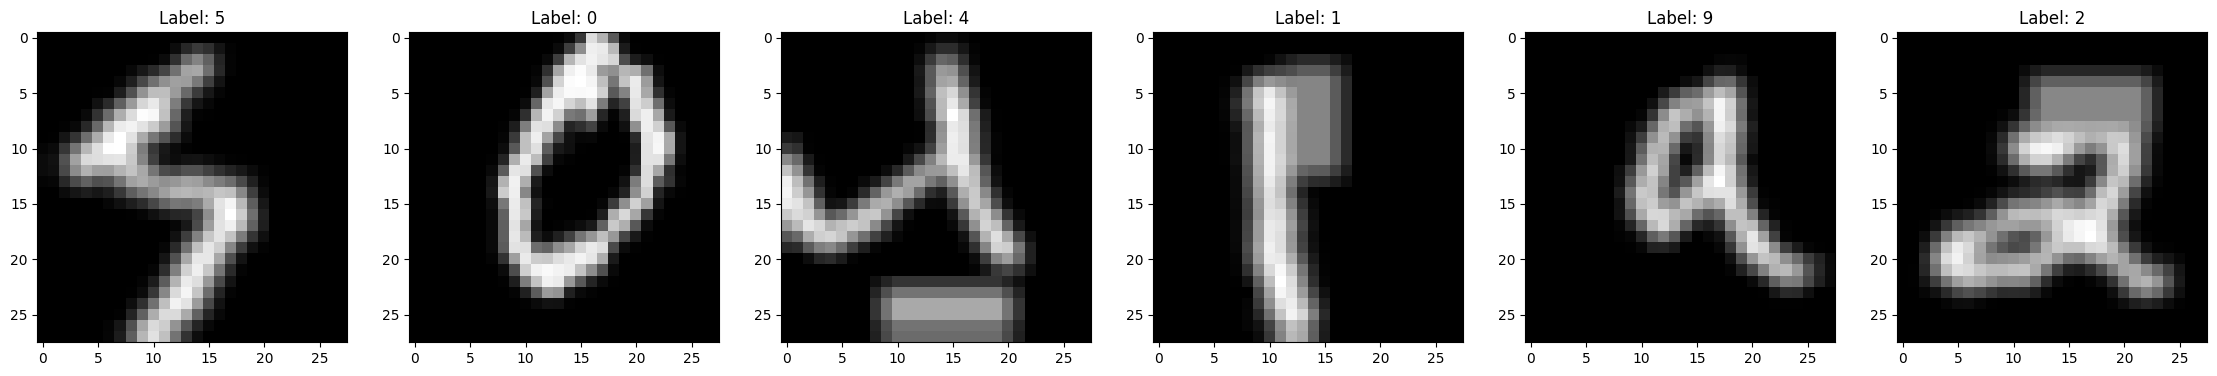

In [49]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

transform = transforms.Compose([    
    transforms.ToTensor(),
    transforms.RandomAffine(60, translate=(0.1, 0.1)),
    transforms.Normalize((0.5,), (0.5,)),
    transforms.RandomResizedCrop(28, scale=(0.8, 1.0)),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.1)),
    transforms.GaussianBlur(kernel_size=3)
    # transforms.RandomHorizontalFlip(),
    # transforms.RandomVerticalFlip()

])


dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)

dataloader = DataLoader(dataset, batch_size=60, shuffle=False)

def show_images(images, labels):
    fig, axes = plt.subplots(1, 6, figsize=(28, 28))
    
    for i in range(6):
        axes[i].imshow(images[i].squeeze(), cmap='gray')
        axes[i].set_title(f'Label: {labels[i]}')
    plt.show()

data_iter = iter(dataloader)
images, labels = next(data_iter)

show_images(images, labels)
